In [1]:
import pandas as pd


In [2]:
df= pd.read_csv("car data.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
print(df["seller_type"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())
print(df["fuel"].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [6]:
##check missing or null value
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
final_dataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [10]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
final_dataset["Current year"]= 2020

In [12]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [13]:
final_dataset['no_year']= final_dataset['Current year']-final_dataset['year']

In [14]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [15]:
final_dataset.drop(['year'],axis=1, inplace=True)

In [16]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Current year,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [17]:
final_dataset.drop(['Current year'],axis=1, inplace=True)

In [18]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [19]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [20]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [21]:
final_dataset.drop('owner_Fourth & Above Owner', axis=1,inplace=True)

In [22]:
final_dataset.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.068068,0.009152,0.030802


In [23]:
final_dataset.drop("owner_Test Drive Car",axis=1,inplace=True)

In [24]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0
4,450000,141000,6,1,0,0,0,1,0,1,1,0


In [25]:
import seaborn as sns

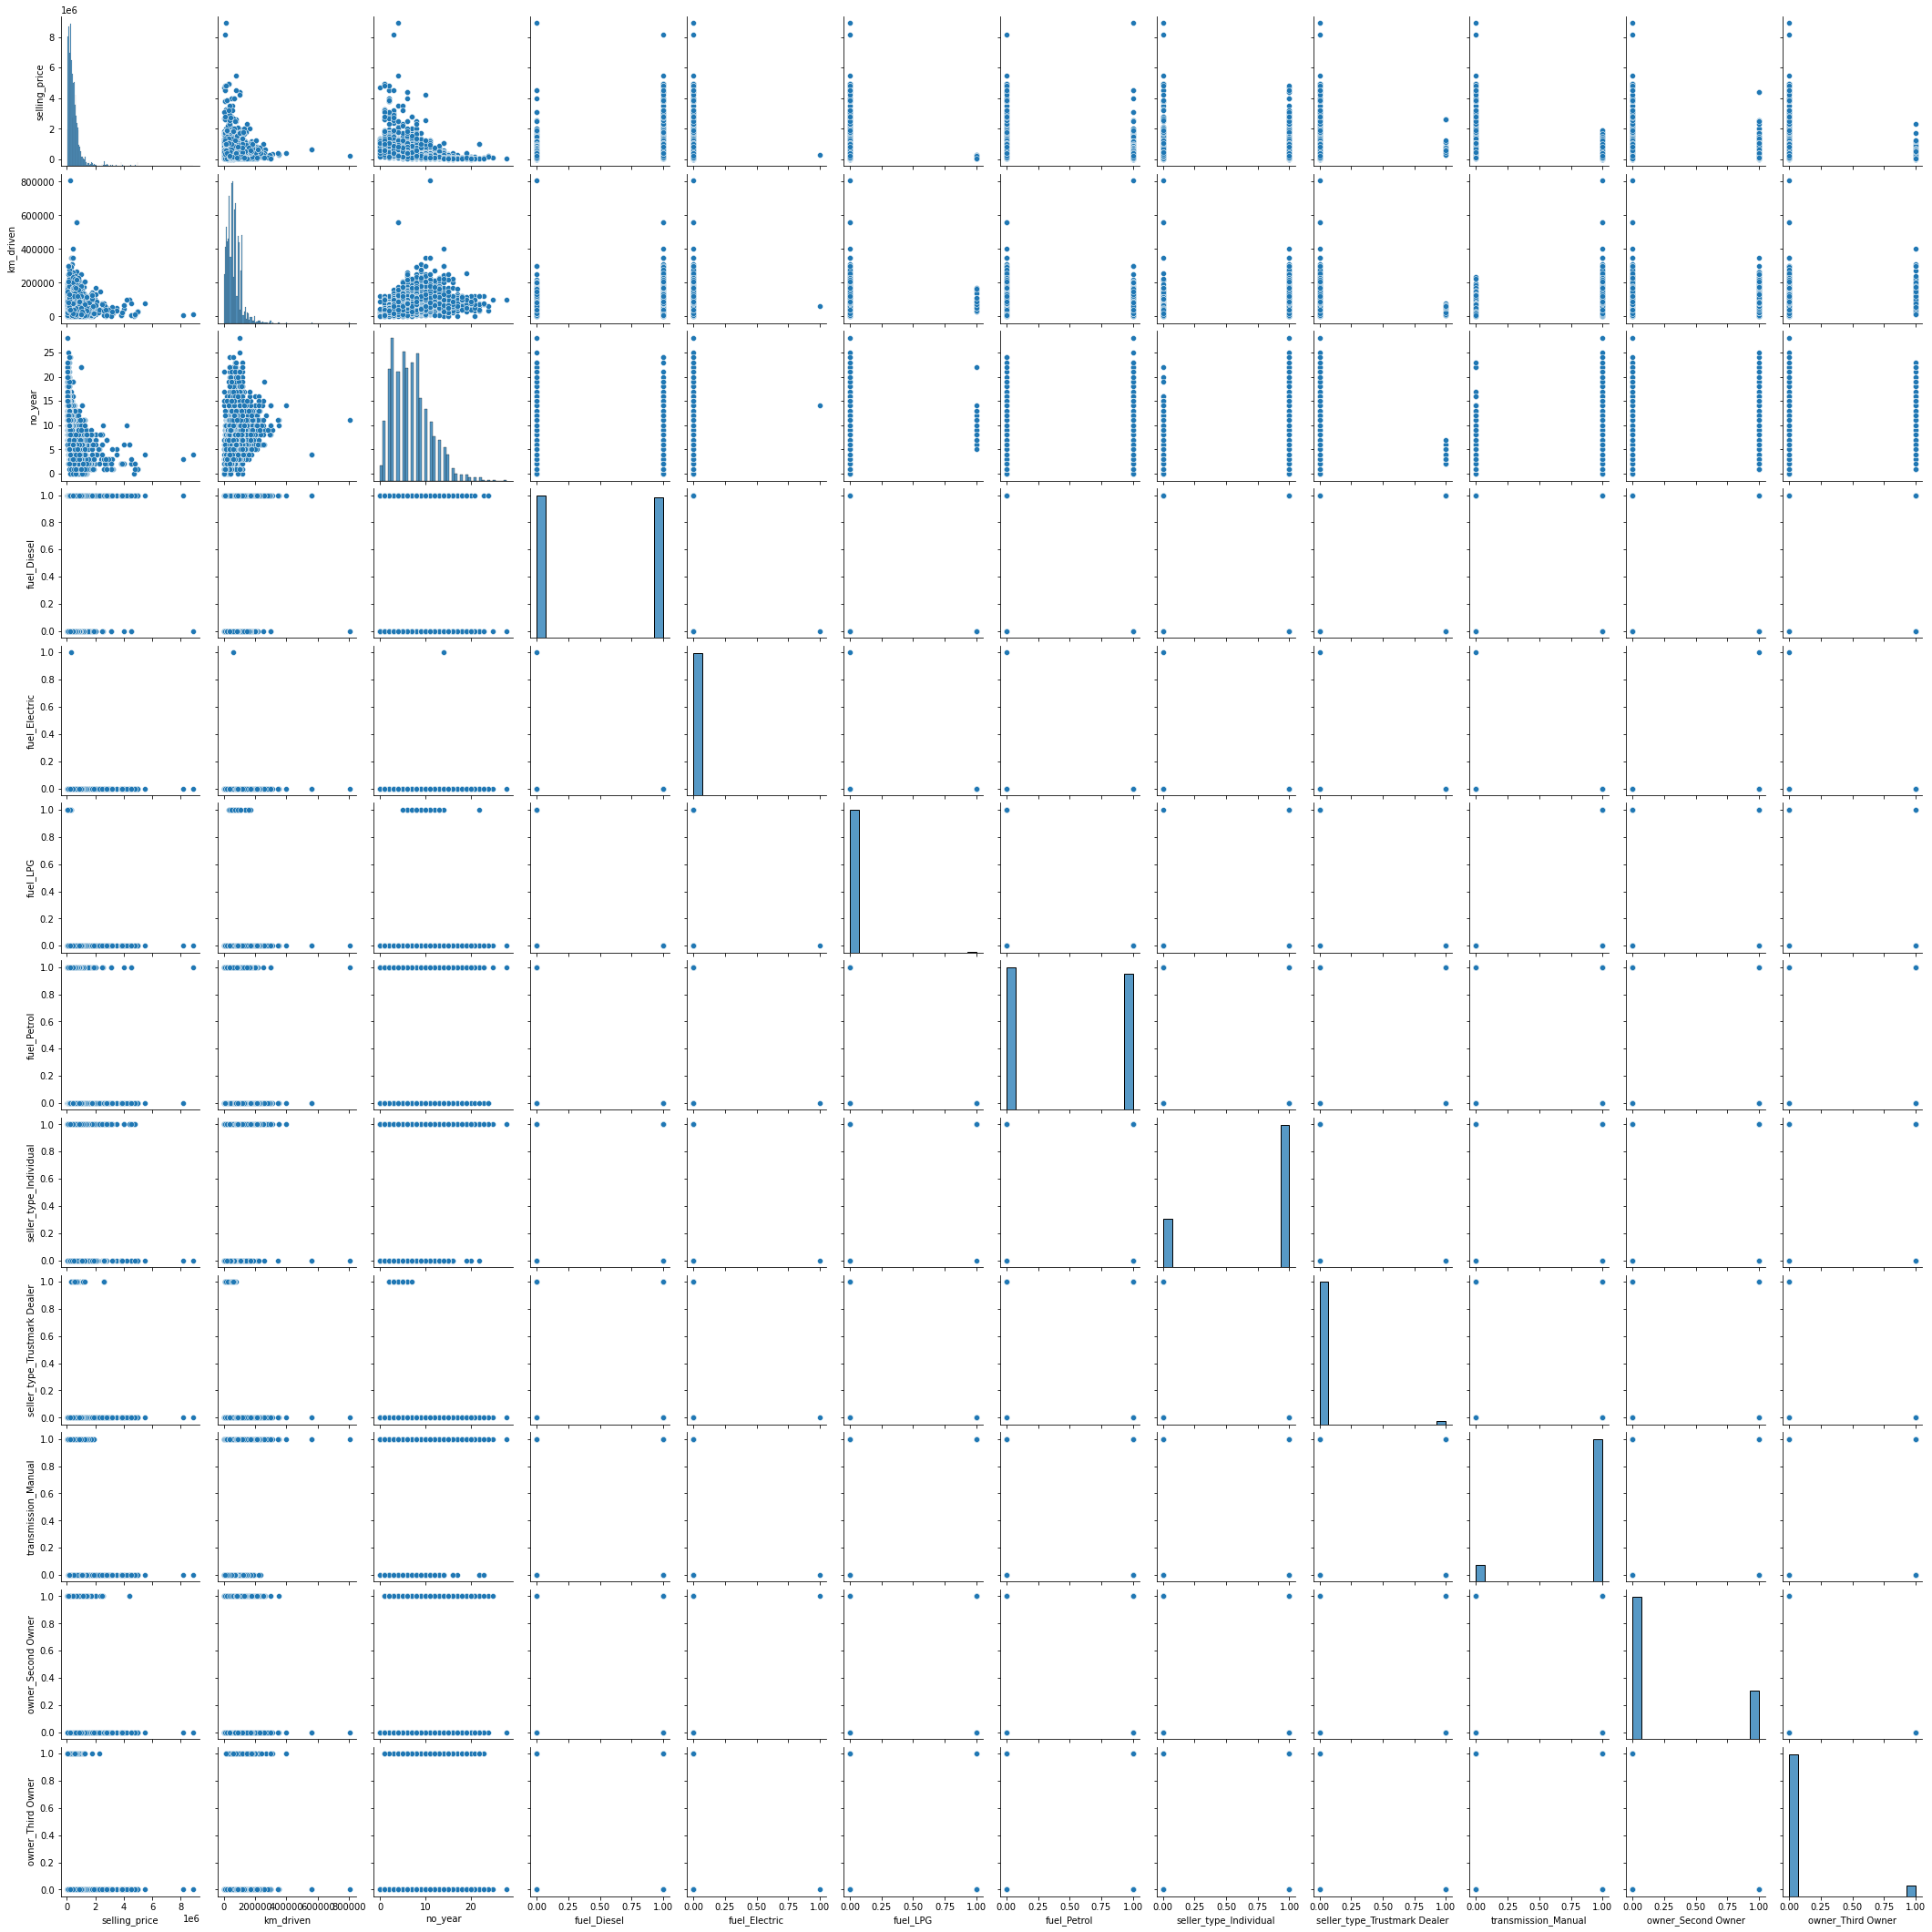

In [26]:
sns.pairplot(final_dataset)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

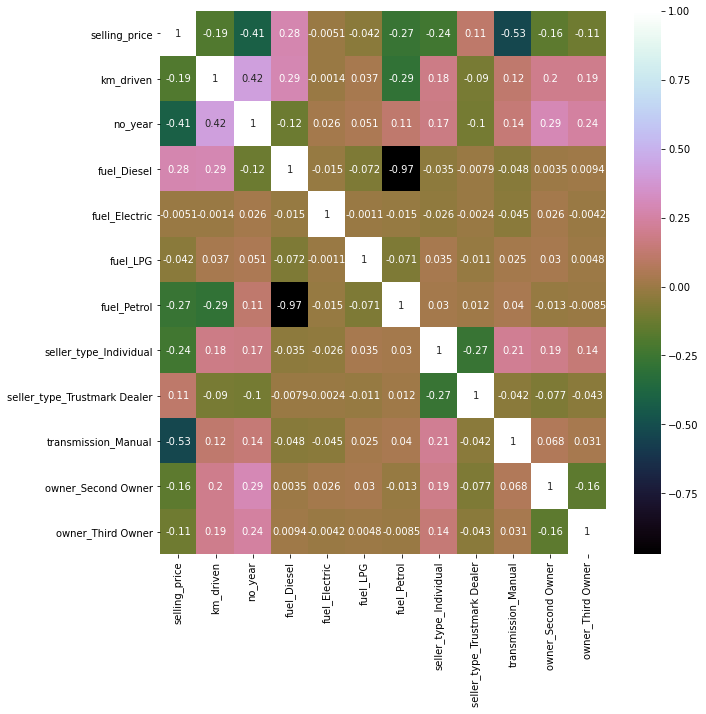

In [28]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="cubehelix")

In [29]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0
4,450000,141000,6,1,0,0,0,1,0,1,1,0


In [30]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [31]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0
1,50000,13,0,0,0,1,1,0,1,0,0
2,100000,8,1,0,0,0,1,0,1,0,0
3,46000,3,0,0,0,1,1,0,1,0,0
4,141000,6,1,0,0,0,1,0,1,1,0


In [32]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [34]:
###feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[2.47917343e-01 2.44505674e-01 1.30116099e-01 2.02627579e-05
 2.39366888e-05 2.25896175e-04 4.84941923e-02 9.35960361e-03
 2.92992188e-01 2.21551927e-02 4.18961050e-03]


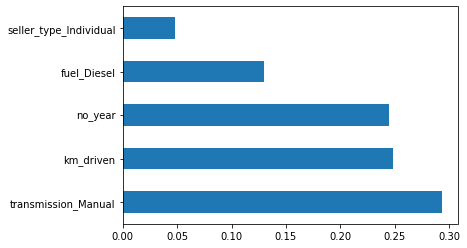

In [36]:
#plot a graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [39]:
X_train.shape

(3472, 11)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [41]:
##hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num= 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [44]:
#randomized search cv

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num= 12)]
# Number of features to consider at ecery split
max_features = ["auto","sqrt"]
#Max number of level in tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
#max_depth.append(None)
#minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]             
             

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
#Create the random grid
random_grid ={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
#Use the random grid to search for best hyperparameters
#First Create the base model to tune 
rf = RandomForestRegressor()

In [49]:
rf_random =RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv= 5, verbose=2, random_state=42,n_jobs=1)

In [50]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
predictions=rf_random.predict(X_test)

In [52]:
predictions

array([ 311219.31157944,  935953.97319036,  899675.52741432,
        383809.59966966,  450237.62433397,  689857.90699733,
         98307.80457855,  282010.47338029,   86959.3203036 ,
        443705.85685929,  508981.89451254,  390009.32136715,
        114801.10001089,  645097.43087513, 1449769.58836968,
        663843.7873252 ,  223813.03769377,  472131.4510816 ,
        359695.22218114,  965976.847275  , 1329313.58248428,
        392045.07922483,  582953.97159684,  100779.0817527 ,
        211487.18766369,  412927.74315468, 1350371.24766016,
        400790.77439692,  650482.90526071,  112373.96398285,
        334280.06798248,  740325.86963789,  317384.21425262,
        657925.34665899,  340327.95930562,  490248.68575036,
       1304941.31755583,  139478.75757881,  954689.16463825,
        428548.7595648 ,  320596.34724382,  350552.23181554,
        170115.63817498,  990689.06928829,  701152.95905191,
        455675.15657567,  582953.97159684, 1003110.68280026,
        184569.96116531,

c:\python3.8.5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

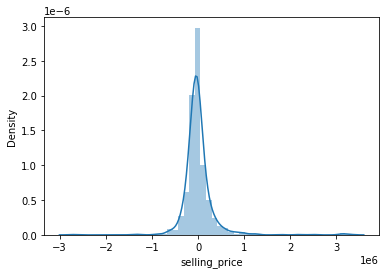

In [53]:
sns.distplot(y_test-predictions)

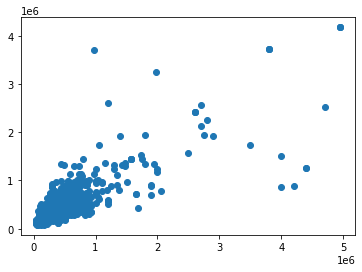

In [58]:
plt.scatter(y_test,predictions)


In [59]:
import pickle
#open a file where you want to store the data
file = open('random_forest_regression_model.pickle','wb')

#dump information to that file
pickle.dump(rf_random,file)
